<a href="https://colab.research.google.com/github/ahsanzubair172/CNN-classification-/blob/main/cnn_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install tensorflow numpy matplot

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import zipfile

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Define image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 256, 256
BATCH_SIZE = 4

In [ ]:
#  ImageDataGenerator for augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.2,  # Apply random shearing transformations
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Define ImageDataGenerator for validation (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("archive")

In [ ]:
# Load training data from directory
train_generator = train_datagen.flow_from_directory(
    r'/content/archive/training_set/training_set',
    target_size=(IMG_WIDTH, IMG_HEIGHT),  # Resize images to match the input size of the model
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Use 'binary' for two classes (cats and dogs)
)

# Load validation data from directory
validation_generator = validation_datagen.flow_from_directory(
    r'/content/archive/test_set/test_set',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


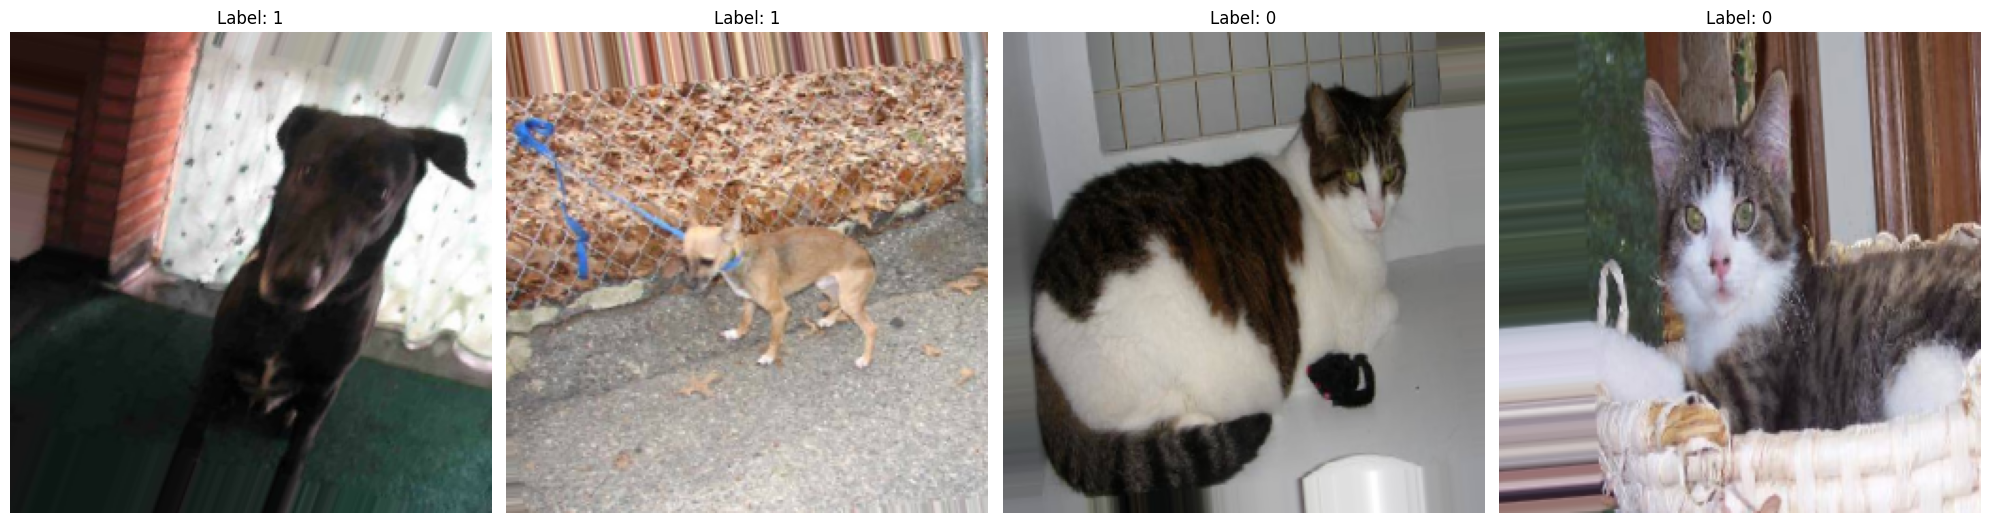

In [ ]:
#  Visualize augmented images from the train_generator
augmented_images, labels = next(train_generator)  # Get one batch of augmented images

# Display 12 images
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))  # 3 rows, 4 columns
ax = ax.flatten()

for idx, img in enumerate(augmented_images[:4]):
    ax[idx].imshow(img)  # Images are already normalized to [0, 1]
    ax[idx].title.set_text(f"Label: {int(labels[idx])}")  # Display the label (0 or 1)
    ax[idx].axis('off')  # Turn off axes for better visualization

# Hide any unused subplots
for unused_ax in ax[len(augmented_images[:4]):]:
    unused_ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define the CNN architecture

LR = tf.keras.layers.LeakyReLU(alpha=0.1)

# Define the model
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), padding='SAME', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    LR,
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # Convolutional Block 2
    Conv2D(64, (3, 3), padding='SAME'),LR,
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    # Convolutional Block 3
    Conv2D(128, (3, 3),  padding='SAME'),LR,
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),


    # Flatten the output
    Flatten(),


    # Dense Layers
    # Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    # Dropout(0.25),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.25),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
#Rmsprop
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     8,388,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,484,929 (32.37 MB)

 Trainable params: 8,484,481 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train the model
EPOCHS = 25
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 184s 89ms/step - accuracy: 0.5114 - loss: 2.2809 - val_accuracy: 0.5126 - val_loss: 1.3610
Epoch 2/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.5286 - loss: 1.2160 - val_accuracy: 0.5650 - val_loss: 0.8151
Epoch 3/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.5075 - loss: 0.8029 - val_accuracy: 0.4998 - val_loss: 0.7516
Epoch 4/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - accuracy: 0.4977 - loss: 0.7620 - val_accuracy: 0.4998 - val_loss: 0.7152
Epoch 5/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 139s 70ms/step - accuracy: 0.5027 - loss: 0.7159 - val_accuracy: 0.4998 - val_loss: 0.7041
Epoch 6/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.4938 - loss: 0.7022 - val_accuracy: 0.4998 - val_loss: 0.6976
Epoch 7/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 145s 71ms/step - accuracy: 0.5055 - loss: 0.6966 - val_accuracy: 0.4998 - val_loss: 0.6945
Epoch 8/25
2002/2002 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 

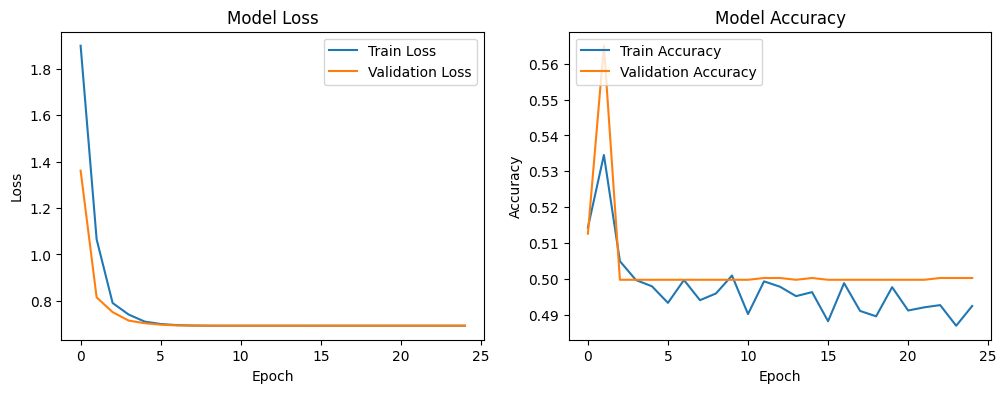

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=len(validation_generator) // BATCH_SIZE)
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5074 - loss: 0.9246
Validation Loss: 0.9442430734634399
Validation Accuracy: 0.4718542993068695


152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


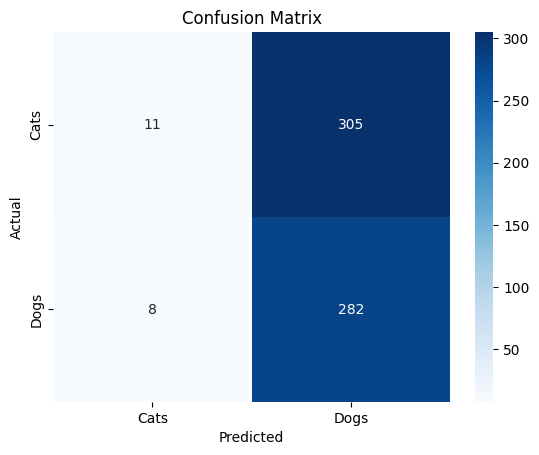

              precision    recall  f1-score   support

        Cats       0.58      0.03      0.07       316
        Dogs       0.48      0.97      0.64       290

    accuracy                           0.48       606
   macro avg       0.53      0.50      0.35       606
weighted avg       0.53      0.48      0.34       606



In [ ]:
# Generate predictions and evaluate using confusion matrix and classification report
y_pred = model.predict(validation_generator, steps=None)  # Process the entire validation set
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
conf_matrix = confusion_matrix(validation_generator, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cats', 'Dogs'], yticklabels=['Cats', 'Dogs'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(validation_generator, y_pred, target_names=['Cats', 'Dogs']))